In [1]:
import requests
from urllib.request import urlopen
from urllib.parse import urlencode,unquote,quote_plus
import urllib
import lxml
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

# 안전보건법령 간

In [2]:
df_industrial = pd.read_excel("산업안전보건법.xlsx")
df_erection = pd.read_excel("건설기술진흥법.xlsx")
df_danger = pd.read_excel("위험물안전관리법.xlsx")
df_electric = pd.read_excel("전기안전관리법.xlsx")
df_chemistry = pd.read_excel("화학물질관리법.xlsx")
df_info = pd.DataFrame()
df_info = df_info.append(df_industrial,ignore_index = True)
df_info = df_info.append(df_erection,ignore_index = True)
df_info = df_info.append(df_danger,ignore_index = True)
df_info = df_info.append(df_electric,ignore_index = True)
df_info = df_info.append(df_chemistry,ignore_index = True)
df_info

,키,조내용
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...
...,...,...
452,600015,제60조(벌칙) 제43조제2항에 따라 즉시 신고를 하지 아니한 자는 2년 이하의 징...
453,610015,제61조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1년 이하의 징역 또는 3...
454,620015,제62조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 6개월 이하의 징역 또는 ...
455,630015,"제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종..."


In [3]:
jo_key = [str(i) for i in df_info.get('키')]
df_info['키'] = jo_key
jo_key

['10011',
 '20011',
 '30011',
 '40011',
 '50011',
 '60011',
 '70011',
 '80011',
 '90011',
 '100011',
 '110011',
 '120011',
 '130011',
 '140011',
 '150011',
 '160011',
 '170011',
 '180011',
 '190011',
 '200011',
 '210011',
 '220011',
 '230011',
 '240011',
 '250011',
 '260011',
 '270011',
 '280011',
 '290011',
 '300011',
 '310011',
 '320011',
 '330011',
 '340011',
 '350011',
 '360011',
 '370011',
 '380011',
 '390011',
 '400011',
 '410011',
 '420011',
 '430011',
 '440011',
 '450011',
 '460011',
 '470011',
 '480011',
 '490011',
 '500011',
 '510011',
 '520011',
 '530011',
 '540011',
 '550011',
 '560011',
 '570011',
 '580011',
 '590011',
 '600011',
 '610011',
 '620011',
 '630011',
 '640011',
 '650011',
 '660011',
 '670011',
 '680011',
 '690011',
 '700011',
 '710011',
 '720011',
 '730011',
 '740011',
 '750011',
 '760011',
 '770011',
 '780011',
 '790011',
 '800011',
 '810011',
 '820011',
 '830011',
 '840011',
 '850011',
 '860011',
 '870011',
 '880011',
 '890011',
 '900011',
 '910011',
 '920011

In [4]:
stop_words_df = pd.read_excel("stopwords.xlsx")
stop_words_df

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
694,따른
695,필요한
696,등을
697,해당하는


In [5]:
# okt = Okt()
# tokenized_data = []
# for sentence in df_info['조내용']:
#     temp_X = okt.morphs(sentence, stem=True) # 토큰화
#     temp_X = [word for word in temp_X if not word in stop_words and len(word) > 1] # 불용어 제거
#     tokenized_data.append(temp_X)

In [6]:
from eunjeon import Mecab
tagger = Mecab()

In [7]:
posts = df_info.get('조내용')

def tokenizer(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    nouns = []
  
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words:
            nouns.append(noun)
    return nouns

tokenized_data = []

for sentence in posts:
    temp_X = tokenizer(sentence)
    tokenized_data.append(temp_X)
len(tokenized_data)

457

조문의 최대 길이 : 525
조문의 평균 길이 : 78.43326039387308


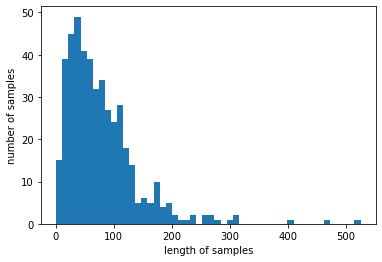

In [8]:
print('조문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('조문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
df_info['Token'] = tokenized_data
df_info

,키,조내용,Token
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...,"[목적, 법, 안전, 보건, 기준, 확립, 책임, 소재, 재해, 예방, 작업, 환경..."
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...,"[정의, 법, 사용, 용어, 뜻, 개정, 산업재, 노무, 제공, 사람, 업무, 관계..."
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업...","[적용, 범위, 법, 사업, 적용, 유해, 위험, 정도, 사업, 종류, 사업장, 상..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...,"[정부, 책무, 정부, 법, 목적, 달성, 호의, 이행, 책무, 개정, 정부, 호의..."
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...,"[사업주, 의무, 사업주, 특수, 형태, 근로, 종사자, 노무, 제공, 물건, 수거..."
...,...,...,...
452,600015,제60조(벌칙) 제43조제2항에 따라 즉시 신고를 하지 아니한 자는 2년 이하의 징...,"[벌칙, 조제, 신고, 이하, 징역, 억, 원, 이하, 벌금]"
453,610015,제61조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1년 이하의 징역 또는 3...,"[벌칙, 이하, 징역, 천만, 원, 이하, 벌금, 개정, 조제, 허가, 조건, 이행..."
454,620015,제62조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 6개월 이하의 징역 또는 ...,"[벌칙, 개월, 이하, 징역, 만, 원, 이하, 벌금, 개정, 조제, 단서, 위반,..."
455,630015,"제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종...","[양벌규정, 법인, 대표자, 법인, 개인, 대리인, 사용, 밖, 종업원, 법인, 개..."


In [10]:
for i in range(len(df_info)):
    if '삭제' in df_info.iloc[i][1][:10]:
        print(i)
        df_info.iloc[[i]] = ' '

220
431
432
433


In [11]:
df_info.isnull().sum()

키        0
조내용      0
Token    0
dtype: int64

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [13]:
model.wv.vectors.shape

(711, 100)

In [14]:
model.wv.most_similar('개정')

[('설계', 0.9985173344612122),
 ('실적', 0.9982189536094666),
 ('선정', 0.9981066584587097),
 ('시공', 0.9980500936508179),
 ('소속', 0.9980403780937195),
 ('업자', 0.9978753924369812),
 ('우수', 0.9978402853012085),
 ('신설', 0.9977818727493286),
 ('효율', 0.9977592825889587),
 ('손해', 0.9975468516349792)]

In [15]:
import pandas , nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer

In [16]:
# Great Input Data
# doc2vec 입력 형식에 맞게 데이터를 수정한다.
# tags = 문서 ID
# words = 단어 list

doc_df = df_info[['키','Token']].values.tolist()
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]
doc_df

[['10011',
  ['목적',
   '법',
   '안전',
   '보건',
   '기준',
   '확립',
   '책임',
   '소재',
   '재해',
   '예방',
   '작업',
   '환경',
   '조성',
   '노무',
   '제공',
   '사람',
   '안전',
   '보건',
   '유지',
   '목적',
   '개정']],
 ['20011',
  ['정의',
   '법',
   '사용',
   '용어',
   '뜻',
   '개정',
   '산업재',
   '노무',
   '제공',
   '사람',
   '업무',
   '관계',
   '건설물',
   '작업',
   '밖',
   '업무',
   '사망',
   '부상',
   '질병',
   '말',
   '중대',
   '재해',
   '재해',
   '중',
   '사망',
   '재해',
   '정도',
   '재해자',
   '발생',
   '고용',
   '노동',
   '부령',
   '재해',
   '말',
   '근로자',
   '란',
   '근로',
   '기준',
   '법',
   '조제',
   '근로자',
   '말',
   '사업주',
   '근로자',
   '사용',
   '사업',
   '말',
   '근로자',
   '대표',
   '근로자',
   '과반수',
   '조직',
   '노동조합',
   '노동조합',
   '근로자',
   '과반수',
   '조직',
   '노동조합',
   '근로자',
   '과반수',
   '대표',
   '말',
   '도급',
   '명칭',
   '물건',
   '제조',
   '서비스',
   '제공',
   '밖',
   '업무',
   '계약',
   '말',
   '도급인',
   '물건',
   '제조',
   '서비스',
   '제공',
   '밖',
   '업무',
   '도급',
   '사업주',
   '말',
   '건설',
   '공사',
   '발주자',
   '제외',
   '

# Training
파라메터 설명
- window: 모델 학습할때 앞뒤로 보는 단어의 수
- size: 벡터 차원의 크기
- alpha: learning rate
- min_count: 학습에 사용할 최소 단어 빈도 수
- dm: 학습방법 1 = PV-DM, 0 = PV-DBOW
- negative: Complexity Reduction 방법, negative sampling
- max_epochs: 최대 학습 횟수

In [17]:
max_epochs = 50
vec_size = 100
model = Doc2Vec(
    window=5,
    vector_size=vec_size,
    alpha=0.025, 
    min_alpha=0.00025,
    min_count=5,
    dm =1,
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs
               )
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
# model.save('doc2vec_50epochs.model')
# print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49


In [18]:
# model = Doc2Vec.load('doc2vec_50epochs.model')

# 결과 확인
특정 문서와 유사한 문서를 찾기 위해서는 2단계를 거친다.
1. 문서의 vector화
2. 변환된 vector와 가장 가까운 vector 추출
* infer_vector 사용시 seed값을 주지 않으면 random한값이 seed로 사용되어 값이 계속 변경된다.
* 학습되지 않은 단어를 사용한 문서도 결과가 나온다.

https://hanshuginn.blogspot.com/2019/03/python-doc2vec.html

In [19]:
def get_key(k) :
    if k[-1] == "1" :
        s = "OSH"+k[0:(len(k)-4)]
    elif k[-1]=="2":
        s = "CTP"+k[0:(len(k)-4)]
    elif k[-1]=="3":
        s = "HSM"+k[0:(len(k)-4)]
    elif k[-1]=="4":
        s = "ESM"+k[0:(len(k)-4)]
    elif k[-1]=="5":
        s = "CMM"+k[0:(len(k)-4)]  
    if k[-3] != "0":
        s += "의 "+k[-3]
    return s

In [20]:
def get_law(law):
    if law == '산업안전보건법':
        num = '1'
    elif law == '건설기술진흥법':
        num = '2'
    elif law == '위험물안전관리법':
        num = '3'
    elif law == '전기안전관리법':
        num = '4'
    elif law == '화학물질관리법':
        num = '5'
    return num

In [21]:
#model.random.seed(9999)

doc_list = input().split(' ')

# 특정 document를 입력받았을 때 그 document 단어와 유사도가 높은 조 순서대로 출력
print(doc_list)
inferred_vector = model.infer_vector(doc_list)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)

for rd in return_docs:
    for des in df_info[df_info['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1], '\n')
        print(des)
        print()

안전
['안전']
ESM51 0.5352837443351746 

제51조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종업원이 그 법인 또는 개인의 업무에 관하여 제46조부터 제50조까지의 어느 하나에 해당하는 위반행위를 하면 그 행위자를 벌하는 외에 그 법인 또는 개인에게도 해당 조문의 벌금형을 과(科)한다. 다만, 법인 또는 개인이 그 위반행위를 방지하기 위하여 해당 업무에 관하여 상당한 주의와 감독을 게을리 하지 아니한 경우에는 그러하지 아니하다. 

CTP90 0.5315719246864319 

제90조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종업원이 그 법인 또는 개인의 업무에 관하여 제85조의 위반행위를 하면 그 행위자를 벌하는 외에 그 법인 또는 개인에게도 10억원 이하의 벌금에 처한다. 다만, 법인 또는 개인이 그 위반행위를 방지하기 위하여 해당 업무에 관하여 상당한 주의와 감독을 게을리하지 아니한 경우에는 그러하지 아니하다. 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종업원이 그 법인 또는 개인의 업무에 관하여 제86조, 제88조 또는 제89조의 위반행위를 하면 그 행위자를 벌하는 외에 그 법인 또는 개인에게도 해당 조문의 벌금형을 과(科)한다. 다만, 법인 또는 개인이 그 위반행위를 방지하기 위하여 해당 업무에 관하여 상당한 주의와 감독을 게을리하지 아니한 경우에는 그러하지 아니하다. 

CMM63 0.5181019902229309 

제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종업원이 그 법인 또는 개인의 업무에 관하여 제57조부터 제62조까지의 어느 하나에 해당하는 위반행위를 하면 그 행위자를 벌하는 외에 그 법인 또는 개인에게도 해당 조문의 벌금형을 과(科)한다. 다만, 법인 또는 개인이 그 위반행위를 방지하기 위하여 해당 업무에 관하여 상당한 주의와 감독을 게을리하지 아니한 경우에는 그러하지 아니하다. 

OSH40 0

In [22]:
len(inferred_vector)

100

In [23]:
return_docs

[('510014', 0.5352837443351746),
 ('900012', 0.5315719246864319),
 ('630015', 0.5181019902229309),
 ('400011', 0.4989156126976013),
 ('730012', 0.48898088932037354),
 ('500014', 0.4845837652683258),
 ('560015', 0.48435989022254944),
 ('960011', 0.4777601361274719),
 ('380013', 0.4777255952358246),
 ('1690011', 0.4775000214576721)]

In [24]:
law = input('법을 입력하세요: ')
jo = input('조를 입력하세요: ')
if len(jo) > 2 and jo[-3] == '의':
    docs = jo + '0' + jo[-1] + '1'+ get_law(law)
else:    
    docs = jo + '001' + get_law(law)

print("조문키: ", docs)
print()

model.random.seed(9999)

for i in range(len(df_info)):
    if df_info.iloc[i][0] == docs:
        doc = df_info.iloc[i][2]
print(doc)
inferred_vector = model.infer_vector(doc)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)
for rd in return_docs:
    for des in df_info[df_info['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1])
        print(des, '\n')

법을 입력하세요: 화학물질관리법
조를 입력하세요: 12
조문키:  120015

['화학', '물질', '조사', '결과', '정보', '공개', '환경부', '화학', '물질', '통계', '조사', '화학', '물질', '배출', '량', '조사', '완료', '사업장', '결과', '지체', '공개', '환경부', '화학', '물질', '취급', '법', '규정', '위반', '환경부', '명령', '이행', '화학', '물질', '취급', '인', '화학', '물질', '취급', '량', '취급', '시설', '정보', '법령', '위반', '사실', '이하', '화학', '물질', '취급', '정보', '공개', '수', '위반', '사실', '관련', '행정', '심판', '행정소송', '계류', '중', '사유', '개정', '정보', '공개', '대상자', '조사', '결과', '화학', '물질', '취급', '정보', '공개', '환경부', '환경', '부령', '바', '공개', '심의', '청구', '수', '조제', '본문', '자료', '보호', '요청', '신설', '화학', '물질', '취급', '정보', '공개', '심의', '관리', '위원회', '화학', '물질', '정보', '공개', '위원회', '개정', '환경부', '화학', '물질', '정보', '공개', '위원회', '심의', '화학', '물질', '취급', '정보', '공개', '대상자', '서면', '통지', '소명', '기회', '부여', '개정', '공개', '관보', '게재', '인터넷', '홈페이지', '게시', '방법', '개정', '규정', '조사', '결과', '정보', '공개', '관련', '기준', '공개', '절차', '화학', '물질', '정보', '공개', '위원회', '구성', '필요', '환경', '부령', '개정', '공개', '국가', '안전', '보장', '공공복리', '지장', '초래', '인정', '조사', '결과', '신뢰', '

In [25]:
return_docs

[('120015', 0.816370964050293),
 ('100015', 0.5522376298904419),
 ('440215', 0.5276044011116028),
 ('480015', 0.49276357889175415),
 ('510014', 0.48670637607574463),
 ('520015', 0.4784560799598694),
 ('210014', 0.4757683277130127),
 ('1680011', 0.47051307559013367),
 ('220015', 0.4692724049091339),
 ('630015', 0.46826714277267456)]

In [26]:
import openpyxl

In [27]:
wb=openpyxl.Workbook()
w1=wb.create_sheet("산업안전보건법 내")
w2=wb.create_sheet("안전보건법령 간")



In [28]:
num=0
w2.merge_cells("A1:K1")
w2["A1"].value="안전보건법령 간 count 기준"

for i in range(2,12):
    w2.cell(row=2, column=i).value=str(i-1)

rng = []
for i in df_info['키']:
    if i[-1] == '1':
        rng.append(i)
        
for idx, key in enumerate(df_info['키'][:len(rng)]):
    
    
    
    if key == ' ':
        w2.cell(row=idx+3, column=1).value='삭제된 조문'

    elif key[-1] == '1' and key[-3] != '0':
        w2.cell(row=idx+3, column=1).value='OSH' + key[:-4] + '의 ' + key[-3]
        doc = df_info.iloc[idx][2]
        
    elif key[-1] == '1':
        w2.cell(row=idx+3, column=1).value='OSH' + key[:-4]
        doc = df_info.iloc[idx][2]
    
    else:
        break
        
    inferred_vector = model.infer_vector(doc)
    return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)

    for rd in return_docs:
        for j in range(2,12):
            w2.cell(row=idx+3, column=j).value=get_key(return_docs[j-2][0])
            

In [29]:
return_docs

[('1750011', 0.8509913086891174),
 ('1720011', 0.6810712218284607),
 ('1690011', 0.5842742323875427),
 ('560015', 0.5733316540718079),
 ('480014', 0.5656677484512329),
 ('600015', 0.5267046689987183),
 ('1680011', 0.5227629542350769),
 ('1710011', 0.5175573229789734),
 ('590015', 0.5152504444122314),
 ('1110011', 0.5061773061752319)]

In [30]:
filename="데이터정리(Doc2Vec)_수정.xlsx"
wb.save(filename)

In [31]:
read_wb = pd.read_excel(filename, sheet_name='안전보건법령 간')
df_wb = pd.DataFrame(read_wb)
df_wb.dropna(inplace=True)
df_wb

,안전보건법령 간 count 기준,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
1,OSH1,ESM50,ESM28,ESM51,OSH1,CMM63,CTP90,ESM19,HSM34,CTP78,CTP73
2,OSH2,OSH2,ESM2,ESM50,OSH39,OSH78,HSM3,CTP6,HSM34,HSM2,CTP1
3,OSH3,ESM50,ESM51,ESM36,CMM63,CTP73,CTP90,ESM45,OSH3,ESM34,ESM32
4,OSH4,OSH4,CTP73,ESM51,CTP10,CTP90,CMM63,ESM50,CTP78,CMM56,HSM38
5,OSH5,OSH5,ESM50,OSH34,OSH6,CTP1,ESM51,CMM63,ESM36,OSH40,ESM45
...,...,...,...,...,...,...,...,...,...,...,...
173,OSH171,OSH171,OSH172,HSM34의 3,OSH168,ESM46,ESM50,ESM28,OSH170,HSM34의 2,OSH90
174,OSH172,OSH172,ESM50,HSM34의 3,OSH168,ESM51,CMM60,ESM48,CMM56,ESM28,CTP86
175,OSH173,ESM50,ESM51,CMM63,CTP90,HSM38,HSM34,OSH173,CTP86,CMM56,CTP73
176,OSH174,OSH174,ESM50,OSH168,OSH170의 2,ESM51,OSH31,OSH167,CMM63,CTP73,CTP90


# 산업안전보건법

In [32]:
jo_key = [str(i) for i in df_industrial.get('키')]
df_industrial['키'] = jo_key
df_industrial

,키,조내용
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...
...,...,...
172,1710011,제171조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1천만원 이하의 벌금에 ...
173,1720011,제172조(벌칙) 제64조제1항 또는 제2항을 위반한 자는 500만원 이하의 벌금에...
174,1730011,"제173조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 ..."
175,1740011,제174조(형벌과 수강명령 등의 병과) 법원은 제38조제1항부터 제3항까지(제166...


In [33]:
# okt = Okt()
# tokenized_data = []
# for sentence in df_industrial['조내용']:
#     temp_X = okt.morphs(sentence, stem=True) # 토큰화
#     temp_X = [word for word in temp_X if not word in stop_words and len(word) > 1] # 불용어 제거
#     tokenized_data.append(temp_X)

In [34]:
tagger = Mecab()

In [35]:
posts = df_industrial.get('조내용')

def tokenizer(raw_texts, pos=["Noun","Alpha","Verb","Number"], stop_words=list(stop_words_df.get("불용어"))):
    nouns = []
  
    for noun in tagger.nouns(raw_texts):
        if noun not in stop_words:
            nouns.append(noun)
    return nouns

tokenized_data = []

for sentence in posts:
    temp_X = tokenizer(sentence)
    tokenized_data.append(temp_X)
len(tokenized_data)

177

조문의 최대 길이 : 525
조문의 평균 길이 : 74.44067796610169


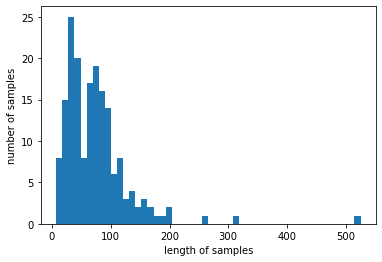

In [36]:
print('조문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('조문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
df_industrial['Token'] = tokenized_data
df_industrial

,키,조내용,Token
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...,"[목적, 법, 안전, 보건, 기준, 확립, 책임, 소재, 재해, 예방, 작업, 환경..."
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...,"[정의, 법, 사용, 용어, 뜻, 개정, 산업재, 노무, 제공, 사람, 업무, 관계..."
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업...","[적용, 범위, 법, 사업, 적용, 유해, 위험, 정도, 사업, 종류, 사업장, 상..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...,"[정부, 책무, 정부, 법, 목적, 달성, 호의, 이행, 책무, 개정, 정부, 호의..."
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...,"[사업주, 의무, 사업주, 특수, 형태, 근로, 종사자, 노무, 제공, 물건, 수거..."
...,...,...,...
172,1710011,제171조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1천만원 이하의 벌금에 ...,"[벌칙, 천만, 원, 이하, 벌금, 개정, 조제, 조제, 조제, 조제, 조제, 조제..."
173,1720011,제172조(벌칙) 제64조제1항 또는 제2항을 위반한 자는 500만원 이하의 벌금에...,"[벌칙, 조제, 위반, 만, 원, 이하, 벌금]"
174,1730011,"제173조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 ...","[양벌규정, 법인, 대표자, 법인, 개인, 대리인, 사용, 밖, 종업원, 법인, 개..."
175,1740011,제174조(형벌과 수강명령 등의 병과) 법원은 제38조제1항부터 제3항까지(제166...,"[형벌, 수강, 명령, 병과, 법원, 조제, 조의, 준용, 조제, 조의, 준용, 조..."


In [38]:
for i in range(len(df_info)):
    if '삭제' in df_info.iloc[i][1][:10]:
        print(i)
        df_info.iloc[[i]] = ' '

In [39]:
doc_df = df_industrial[['키','Token']].values.tolist()
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]
doc_df

[['10011',
  ['목적',
   '법',
   '안전',
   '보건',
   '기준',
   '확립',
   '책임',
   '소재',
   '재해',
   '예방',
   '작업',
   '환경',
   '조성',
   '노무',
   '제공',
   '사람',
   '안전',
   '보건',
   '유지',
   '목적',
   '개정']],
 ['20011',
  ['정의',
   '법',
   '사용',
   '용어',
   '뜻',
   '개정',
   '산업재',
   '노무',
   '제공',
   '사람',
   '업무',
   '관계',
   '건설물',
   '작업',
   '밖',
   '업무',
   '사망',
   '부상',
   '질병',
   '말',
   '중대',
   '재해',
   '재해',
   '중',
   '사망',
   '재해',
   '정도',
   '재해자',
   '발생',
   '고용',
   '노동',
   '부령',
   '재해',
   '말',
   '근로자',
   '란',
   '근로',
   '기준',
   '법',
   '조제',
   '근로자',
   '말',
   '사업주',
   '근로자',
   '사용',
   '사업',
   '말',
   '근로자',
   '대표',
   '근로자',
   '과반수',
   '조직',
   '노동조합',
   '노동조합',
   '근로자',
   '과반수',
   '조직',
   '노동조합',
   '근로자',
   '과반수',
   '대표',
   '말',
   '도급',
   '명칭',
   '물건',
   '제조',
   '서비스',
   '제공',
   '밖',
   '업무',
   '계약',
   '말',
   '도급인',
   '물건',
   '제조',
   '서비스',
   '제공',
   '밖',
   '업무',
   '도급',
   '사업주',
   '말',
   '건설',
   '공사',
   '발주자',
   '제외',
   '

In [40]:
max_epochs = 50
vec_size = 100
model = Doc2Vec(
    window=5,
    vector_size=vec_size,
    alpha=0.025, 
    min_alpha=0.00025,
    min_count=5,
    dm =1,
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs
               )
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49


In [41]:
model.random.seed(9999)

doc_list = input().split(' ')

# 특정 document를 입력받았을 때 그 document 단어와 유사도가 높은 조 순서대로 출력

inferred_vector = model.infer_vector(doc_list)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)
for rd in return_docs:
    for des in df_industrial[df_industrial['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1], '\n')
        print(des)
        print()

관리
OSH27 0.6115329265594482 

제27조(안전보건관리규정의 준수) 사업주와 근로자는 안전보건관리규정을 지켜야 한다. 

OSH16 0.581444263458252 

제16조(관리감독자) 사업주는 사업장의 생산과 관련되는 업무와 그 소속 직원을 직접 지휘ㆍ감독하는 직위에 있는 사람(이하 "관리감독자"라 한다)에게 산업 안전 및 보건에 관한 업무로서 대통령령으로 정하는 업무를 수행하도록 하여야 한다. 관리감독자가 있는 경우에는 「건설기술 진흥법」 제64조제1항제2호에 따른 안전관리책임자 및 같은 항 제3호에 따른 안전관리담당자를 각각 둔 것으로 본다. 

OSH34 0.5791399478912354 

제34조(법령 요지 등의 게시 등) 사업주는 이 법과 이 법에 따른 명령의 요지 및 안전보건관리규정을 각 사업장의 근로자가 쉽게 볼 수 있는 장소에 게시하거나 갖추어 두어 근로자에게 널리 알려야 한다. 

OSH74 0.5785073637962341 

제74조(건설재해예방전문지도기관) 건설재해예방전문지도기관이 되려는 자는 대통령령으로 정하는 인력ㆍ시설 및 장비 등의 요건을 갖추어 고용노동부장관의 지정을 받아야 한다. 제1항에 따른 건설재해예방전문지도기관의 지정 절차, 그 밖에 필요한 사항은 대통령령으로 정한다. 고용노동부장관은 건설재해예방전문지도기관에 대하여 평가하고 그 결과를 공개할 수 있다. 이 경우 평가의 기준ㆍ방법, 결과의 공개에 필요한 사항은 고용노동부령으로 정한다. 건설재해예방전문지도기관에 관하여는 제21조제4항 및 제5항을 준용한다. 이 경우 "안전관리전문기관 또는 보건관리전문기관"은 "건설재해예방전문지도기관"으로 본다. 

OSH20 0.5758777260780334 

제20조(안전관리자 등의 지도ㆍ조언) 사업주, 안전보건관리책임자 및 관리감독자는 다음 각 호의 어느 하나에 해당하는 자가 제15조제1항 각 호의 사항 중 안전 또는 보건에 관한 기술적인 사항에 관하여 지도ㆍ조언하는 경우에는 이에 상응하는 적절한 조치를 하여야 

In [42]:
return_docs

[('270011', 0.6115329265594482),
 ('160011', 0.581444263458252),
 ('340011', 0.5791399478912354),
 ('740011', 0.5785073637962341),
 ('200011', 0.5758777260780334),
 ('1680011', 0.5503582954406738),
 ('820011', 0.5494739413261414),
 ('260011', 0.5436614155769348),
 ('960011', 0.5332608819007874),
 ('940011', 0.528859555721283)]

In [43]:
jo = input('산업안전보건법 내 조를 입력하세요: ')

if len(jo) > 2 and jo[-3] == '의':
    docs = jo + '0' + jo[-1] + '11'
else:    
    docs = jo + '0011'

print("조문키: ", docs)
print()

model.random.seed(9999)

for i in range(len(df_industrial)):
    if df_industrial.iloc[i][0] == docs:
        doc = df_industrial.iloc[i][2]
print(doc)
inferred_vector = model.infer_vector(doc)
return_docs = model.dv.most_similar(positive=[inferred_vector],topn=10)
for rd in return_docs:
    for des in df_industrial[df_industrial['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1])
        print(des, '\n')

산업안전보건법 내 조를 입력하세요: 23
조문키:  230011

['명예', '안전', '감독관', '고용', '노동부', '산업재', '예방', '활동', '참여', '지원', '촉진', '근로자', '근로자', '단체', '사업주', '단체', '산업재', '예방', '관련', '전문', '단체', '소속', '사람', '중', '명예', '안전', '감독관', '위촉', '수', '사업주', '명예', '안전', '감독관', '이하', '명예', '안전', '감독관', '직무', '수행', '관련', '사유', '처우', '명예', '안전', '감독관', '위촉', '방법', '업무', '밖', '필요']
OSH7 0.7090686559677124
제7조(산업재해 예방에 관한 기본계획의 수립ㆍ공표) 고용노동부장관은 산업재해 예방에 관한 기본계획을 수립하여야 한다. 고용노동부장관은 제1항에 따라 수립한 기본계획을 「산업재해보상보험법」 제8조제1항에 따른 산업재해보상보험및예방심의위원회의 심의를 거쳐 공표하여야 한다. 이를 변경하려는 경우에도 또한 같다.  

OSH23 0.5879550576210022
제23조(명예산업안전감독관) 고용노동부장관은 산업재해 예방활동에 대한 참여와 지원을 촉진하기 위하여 근로자, 근로자단체, 사업주단체 및 산업재해 예방 관련 전문단체에 소속된 사람 중에서 명예산업안전감독관을 위촉할 수 있다. 사업주는 제1항에 따른 명예산업안전감독관(이하 "명예산업안전감독관"이라 한다)에 대하여 직무 수행과 관련한 사유로 불리한 처우를 해서는 아니 된다. 명예산업안전감독관의 위촉 방법, 업무, 그 밖에 필요한 사항은 대통령령으로 정한다.  

OSH172 0.5879033803939819
제172조(벌칙) 제64조제1항 또는 제2항을 위반한 자는 500만원 이하의 벌금에 처한다.  

OSH136 0.5648813247680664
제136조(유해인자별 특수건강진단 전문연구기관의 지정) 고용노동부장관은 작업장의 유해인자에 관한 전문연구를 촉진하기

In [44]:
num=0
w1.merge_cells("A1:F1")
w1["A1"].value="산업안전보건법 간 count 기준"

for i in range(2,7):
    w1.cell(row=2, column=i).value=str(i-1)


        
for idx, key in enumerate(df_industrial['키']):
    
    
    
    if key == ' ':
        w1.cell(row=idx+3, column=1).value='삭제된 조문'

    elif key[-1] == '1' and key[-3] != '0':
        w1.cell(row=idx+3, column=1).value='OSH' + key[:-4] + '의 ' + key[-3]
        doc = df_industrial.iloc[idx][2]
        
    elif key[-1] == '1':
        w1.cell(row=idx+3, column=1).value='OSH' + key[:-4]
        doc = df_industrial.iloc[idx][2]
    
    else:
        break
        
    inferred_vector = model.infer_vector(doc)
    return_docs = model.dv.most_similar(positive=[inferred_vector],topn=5)

    for rd in return_docs:
        for j in range(2,7):
            w1.cell(row=idx+3, column=j).value=get_key(return_docs[j-2][0])
            

In [45]:
filename="데이터정리(Doc2Vec)_수정.xlsx"
wb.save(filename)

In [46]:
read_wb = pd.read_excel(filename, sheet_name='산업안전보건법 내')
df_wb = pd.DataFrame(read_wb)
df_wb.dropna(inplace=True)
df_wb

,산업안전보건법 간 count 기준,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
1,OSH1,OSH7,OSH168,OSH1,OSH153,OSH106
2,OSH2,OSH2,OSH78,OSH150,OSH167,OSH153
3,OSH3,OSH7,OSH168,OSH172,OSH3,OSH153
4,OSH4,OSH4,OSH168,OSH23,OSH136,OSH102
5,OSH5,OSH5,OSH7,OSH34,OSH6,OSH61
...,...,...,...,...,...,...
173,OSH171,OSH172,OSH168,OSH171,OSH169,OSH170
174,OSH172,OSH172,OSH168,OSH7,OSH96,OSH48
175,OSH173,OSH173,OSH153,OSH150,OSH7,OSH144
176,OSH174,OSH174,OSH7,OSH31,OSH167,OSH168
